# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [ ]:
X_ = pd.read_csv('subject_train.csv')
y_ = pd.read_csv('y_train.csv')

y_test = pd.read_csv('y_test.csv')
X_test = pd.read_csv('X_test.csv', index_col=[0, 1])

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_, y_, test_size=.25, random_state=1729)

### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

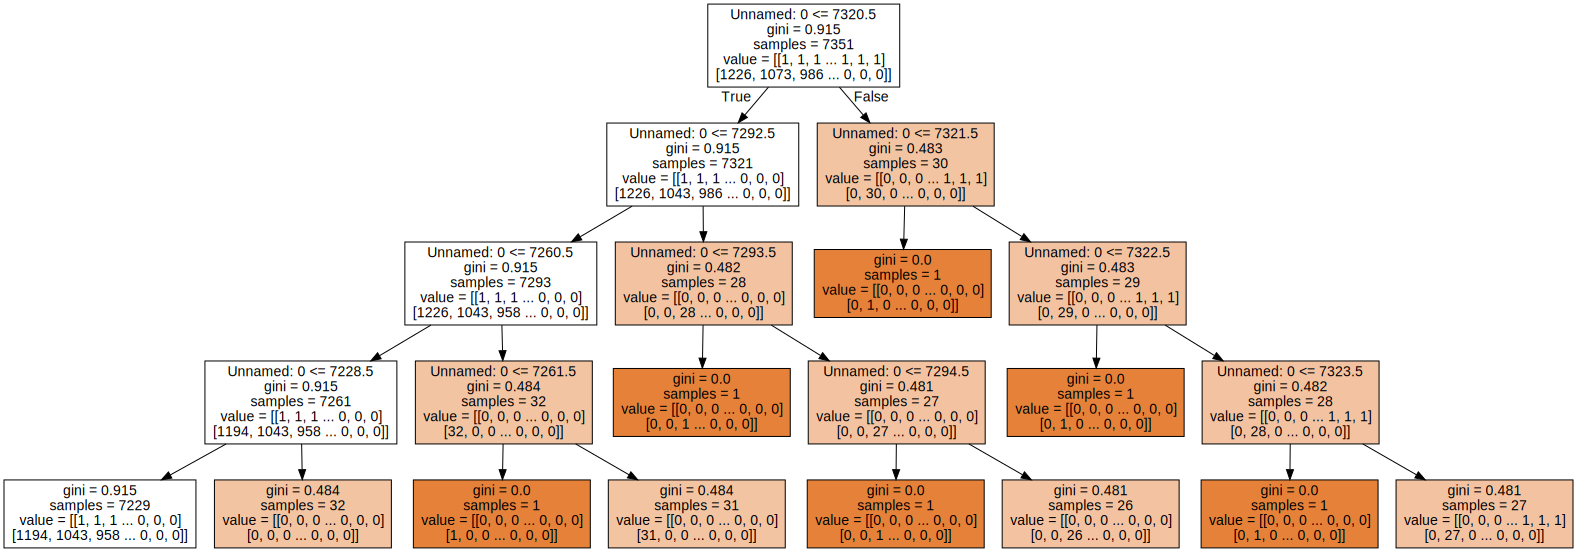

In [ ]:
clf = DecisionTreeClassifier(random_state=100, max_depth = 4).fit(X_, y_)


dot_data = export_graphviz(clf, out_file=None, 
                                feature_names=X_.columns,  
                                filled=True)


graph = graphviz.Source(dot_data, format="png") 
graph

### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

In [ ]:
caminho = DecisionTreeClassifier(random_state=2360873).cost_complexity_pruning_path(X_valid, y_valid)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

In [ ]:
ccp_alphas

array([0.        , 0.00027203, 0.00027203, 0.00027203, 0.00027203,
       0.00027203, 0.00027203, 0.00027203, 0.00027203, 0.00027203,
       0.00027203, 0.00027203, 0.00027203, 0.00027203, 0.00027203,
       0.00027203, 0.00027203, 0.00027203, 0.00027203, 0.00027203,
       0.00027203, 0.00027203, 0.00027203, 0.00027203, 0.00027203,
       0.00027203, 0.00027203, 0.00027203, 0.00027203, 0.00027203,
       0.00027203, 0.00027203, 0.00027203, 0.00027203, 0.00027203,
       0.00027203, 0.00027203, 0.00027203, 0.00027203, 0.00027203,
       0.00027203, 0.00027203, 0.00027203, 0.00027203, 0.00027203,
       0.00027203, 0.00027203, 0.00027203, 0.00027203, 0.00027203,
       0.00027203, 0.00027203, 0.00027203, 0.00027203, 0.00027203,
       0.00027203, 0.00027203, 0.00027203, 0.00027203, 0.00027203,
       0.00027203, 0.00027203, 0.00027203, 0.00027203, 0.00027203,
       0.00027203, 0.00027203, 0.00027203, 0.00027203, 0.00027203,
       0.00027203, 0.00027203, 0.00027203, 0.00027203, 0.00027

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha).fit(X_valid, y_valid)
    clfs.append(clf)

### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de validação.

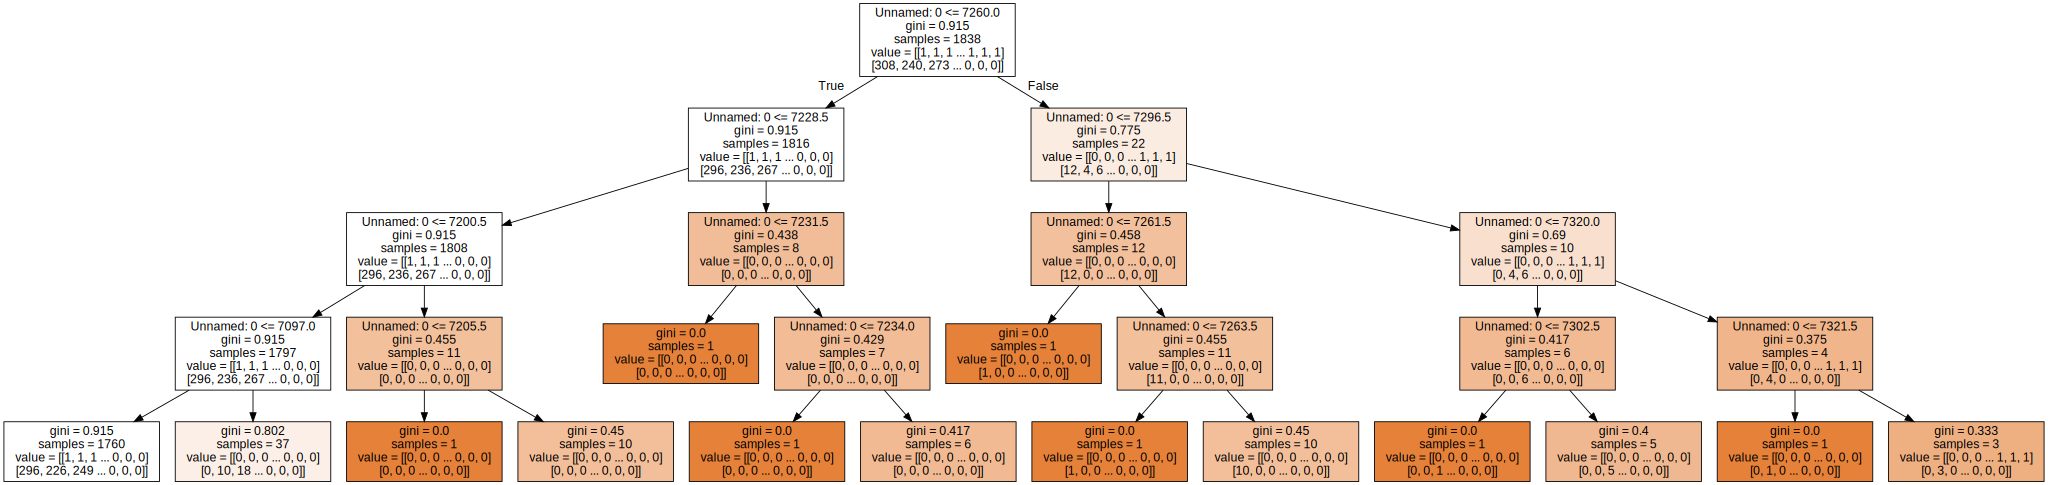

In [ ]:
clf = DecisionTreeClassifier(random_state=100, max_depth = 4).fit(X_valid, y_valid)


dot_data = export_graphviz(clf, out_file=None, 
                                feature_names=y_test.columns,  
                                filled=True)


graph = graphviz.Source(dot_data, format="png") 
graph